In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


colors =np.array([
    [0, 0, 0],
    [128, 0, 0],
    [0, 128, 0],
    [128, 128, 0],
    [0, 0, 128],
    [128, 0, 128],
    [0, 128, 128],
    [128, 128, 128],
    [64, 0, 0],
    [192, 0, 0],
    [64, 128, 0],
    [192, 128, 0],
    [64, 0, 128],
    [192, 0, 128],
    [64, 128, 128],
    [192, 128, 128],
    [0, 64, 0],
    [128, 64, 0],
    [0, 192, 0],
    [128, 192, 0],
    [0, 64, 128],
])


def decode_segmap(image,colors,nc=21):
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  # image.unsqueeze(-1)
  for l in range(0,nc):
    idx = image == l
    r[idx] = colors[l, 0]
    g[idx] = colors[l, 1]
    b[idx] = colors[l, 2]
  rgb = np.stack([r, g, b], axis=2)
  return rgb


def sample(idx):
    img = np.load(f"/home/suhohan/seyeon/basic_architecture/result/pre/loss_dl_0.5/test/epoch300/input/test_{idx}.npy")
    label = np.load(f"/home/suhohan/seyeon/basic_architecture/result/pre/loss_dl_0.5/test/epoch300/target/test_{idx}.npy")
    label[label==255] = 0
    label = label.squeeze(-1)

    output = np.load(f"/home/suhohan/seyeon/basic_architecture/result/pre/loss_dl_0.5/test/epoch300/output/test_{idx}.npy")
    #output = output[:,:,1:]
    output = np.argmax(output, axis=-1)

    print("img_shape: ", img.shape)
    print("label_shape: ", label.shape)
    print("output_shape: ", output.shape)

    pix_lst1 = np.unique(label)
    pix_lst2 = np.unique(output)

    print("label_class_lst: ", pix_lst1)
    print("output_class_lst: ", pix_lst2)
    
    #

    plt.figure(figsize=(12, 4)) 
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(decode_segmap(label, colors, nc=21))
    plt.title("Ground Truth")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(decode_segmap(output, colors, nc=21))
    plt.title("Predicted Output")
    plt.axis("off")

    plt.show()


img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0 15 19]
output_class_lst:  [ 0 19]


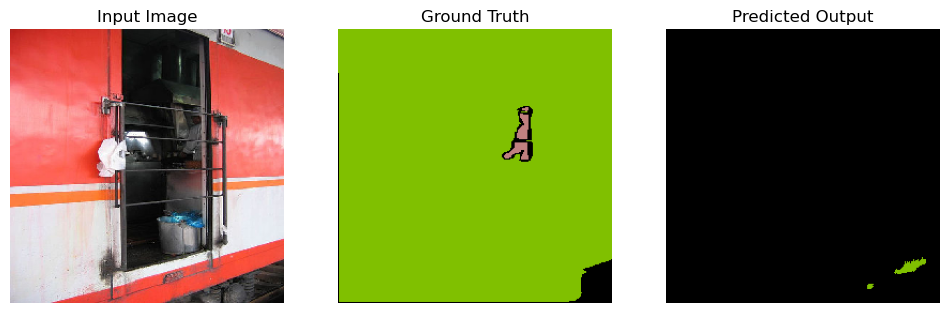

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0 18]
output_class_lst:  [ 0  3 12 18]


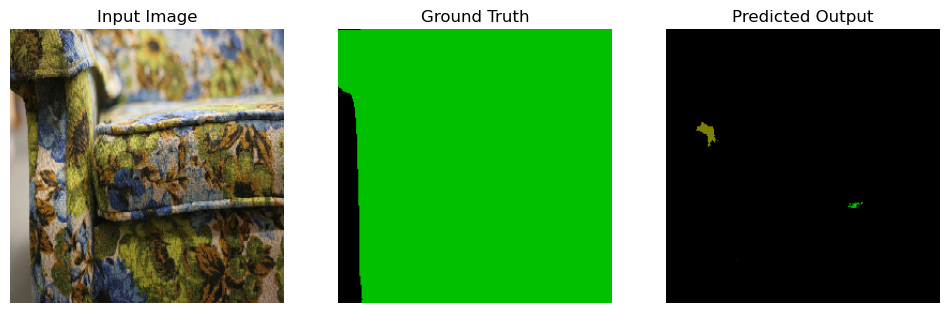

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0  8 12 18]
output_class_lst:  [ 0  8 12 18]


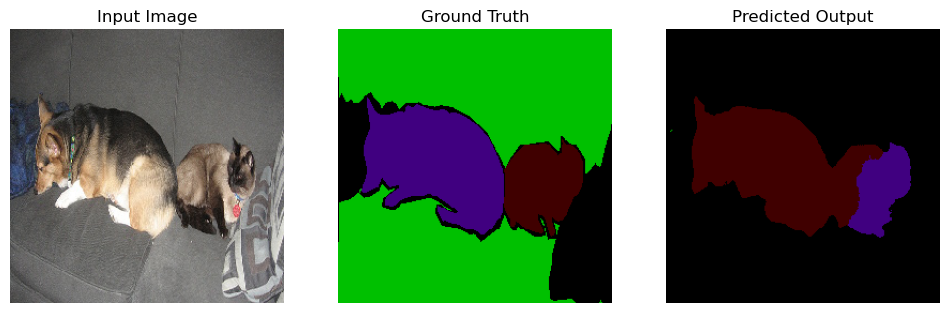

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0  9 12]
output_class_lst:  [ 0  8 18]


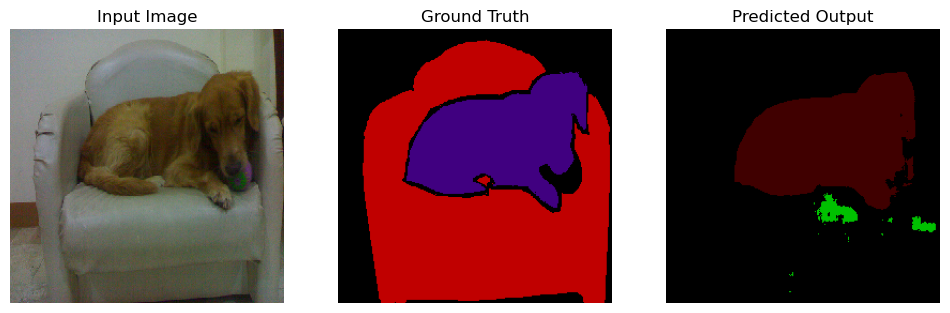

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0  9 11 12 18 20]
output_class_lst:  [ 0  1  5  9 11 13 15 18]


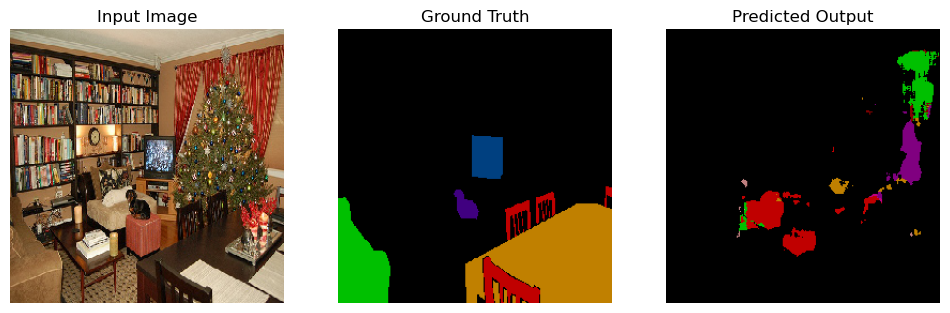

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [0 5]
output_class_lst:  [ 0  8 12]


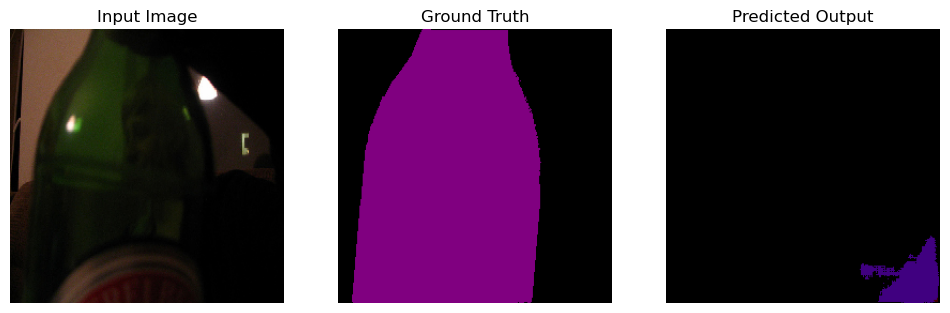

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0  5  9 11 20]
output_class_lst:  [ 0  9 11 15 20]


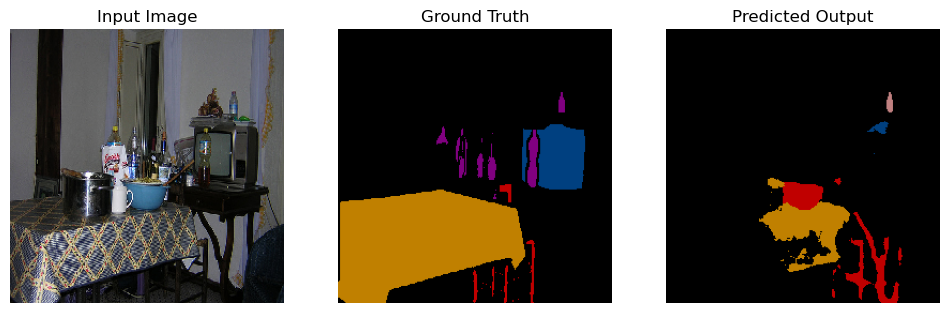

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0  9 16 18]
output_class_lst:  [ 0  5  9 11 13 15 18]


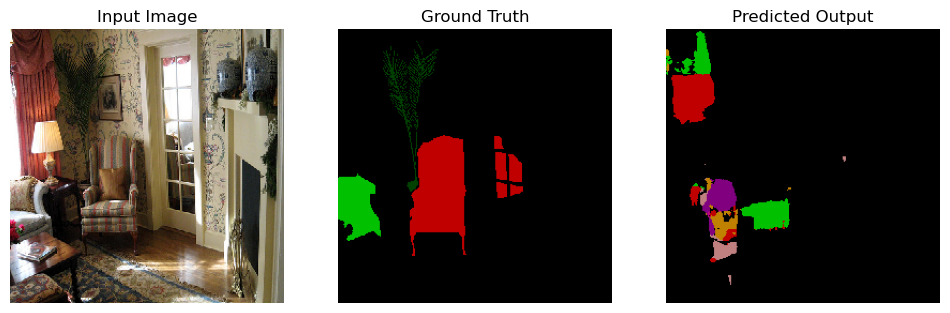

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0 12 15]
output_class_lst:  [ 0  2  8 12 13 15]


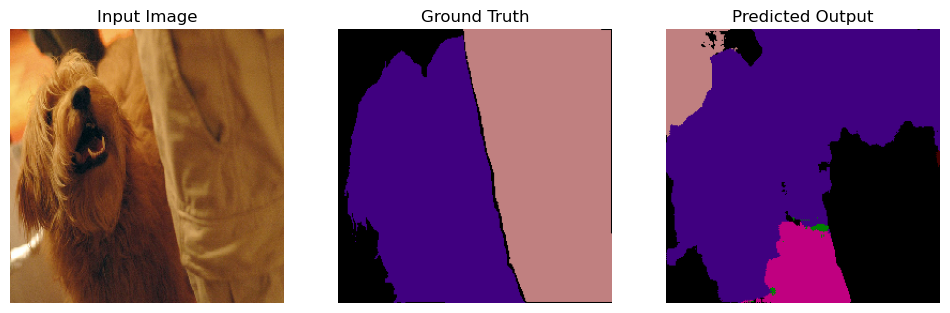

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0 11 15]
output_class_lst:  [ 0  5 10 11 12 13 15 18]


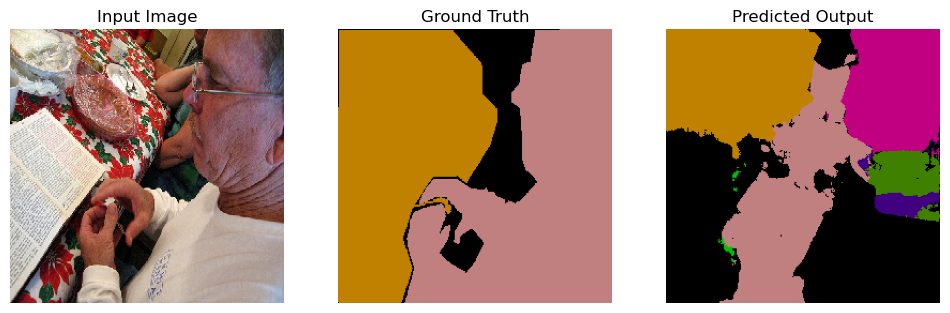

In [3]:
sample(110)
sample(510)
sample(431)
sample(356)
sample(77)
sample(153)
sample(63)
sample(342)
sample(372)
sample(286)

In [ ]:
import os 

fullpath = "/home/suhohan/seyeon/datasets/pascalVOC2012/test/label"
full = os.listdir(fullpath)

x_lst = []
y_lst = []
for i in range(len(full)):
    filepath = os.path.join(fullpath, full[i])
    img = Image.open(filepath)
    x, y = np.array(img).shape

    x_lst.append(x)
    y_lst.append(y)

print(min(x_lst), max(x_lst))
print(min(y_lst), max(y_lst))



175 500
174 500


img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [0 6]
output0_class_lst:  [ 0  6  7 19]
output1_class_lst:  [0 6 7]
output2_class_lst:  [0 6]


(-0.5, 255.5, 255.5, -0.5)

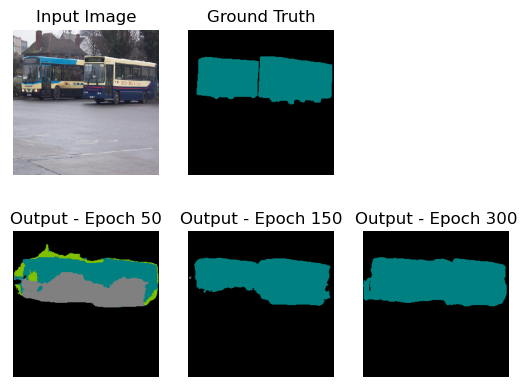

In [45]:
img = np.load(f"/home/suhohan/seyeon/basic_architecture/result/ver0/test/epoch50/input/test_118.npy")
label = np.load(f"/home/suhohan/seyeon/basic_architecture/result/ver0/test/epoch50/target/test_118.npy")
label[label==255] = 0
label = label.squeeze(-1)

output0 = np.load(f"/home/suhohan/seyeon/basic_architecture/result/ver0/test/epoch50/output/test_118.npy")
output0 = np.argmax(output0, axis=-1)

output1 = np.load(f"/home/suhohan/seyeon/basic_architecture/result/ver0/test/epoch150/output/test_118.npy")
output1 = np.argmax(output1, axis=-1)

output2 = np.load(f"/home/suhohan/seyeon/basic_architecture/result/ver0/test/epoch300/output/test_118.npy")
output2 = np.argmax(output2, axis=-1)

print("img_shape: ", img.shape)
print("label_shape: ", label.shape)
print("output_shape: ", output1.shape)

pix_lst1 = np.unique(label)
pix_lst2 = np.unique(output0)
pix_lst3 = np.unique(output1)
pix_lst4 = np.unique(output2)

print("label_class_lst: ", pix_lst1)
print("output0_class_lst: ", pix_lst2)
print("output1_class_lst: ", pix_lst3)
print("output2_class_lst: ", pix_lst4)

#

plt.figure() 
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title("Input Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(decode_segmap(label, colors, nc=21))
plt.title("Ground Truth")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(decode_segmap(output0, colors, nc=21))
plt.title("Output - Epoch 50")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(decode_segmap(output1, colors, nc=21))
plt.title("Output - Epoch 150")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(decode_segmap(output2, colors, nc=21))
plt.title("Output - Epoch 300")
plt.axis("off")


In [ ]:
def get_iou(classes, label, output):
    iou_classes = []
    for index in range(len(classes)):
        intersec = np.logical_and(label == classes[index], output == classes[index]).sum()
        union = np.logical_or(label == classes[index], output == classes[index]).sum()
        iou = intersec/(union+1e-6)
        iou_classes.append(iou)

        #if (iou !=0) & (classes[index]!=0):
            #print(f"class:{classes[index]} - iou: {iou}")
    return iou_classes

classes = range(0,21)

iou = get_iou(classes, label, output2)
iou

[0.9316203570344873,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9091552141973472,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0  5 11 15]
output_class_lst:  [ 0  5 11 15 18]


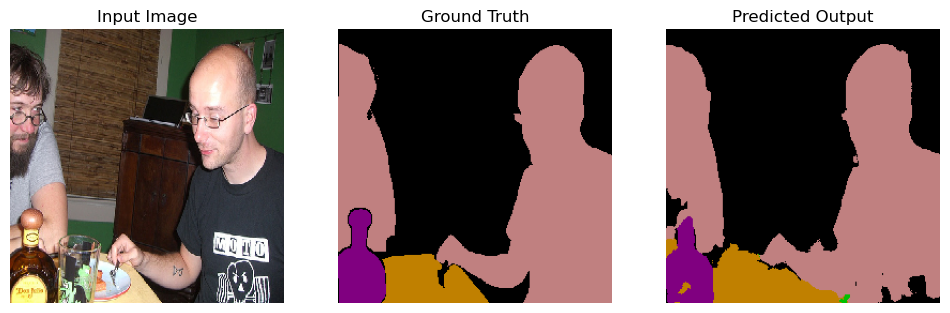

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0  7 14 15]
output_class_lst:  [ 0  6  7 14 15]


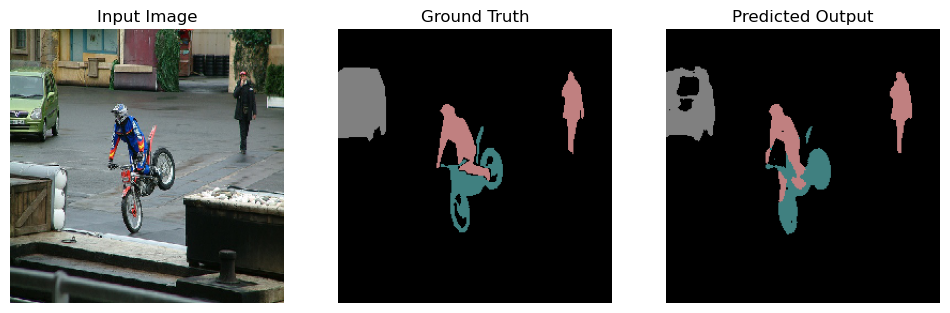

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0  6  7 15]
output_class_lst:  [ 0  1  6  7 14 15]


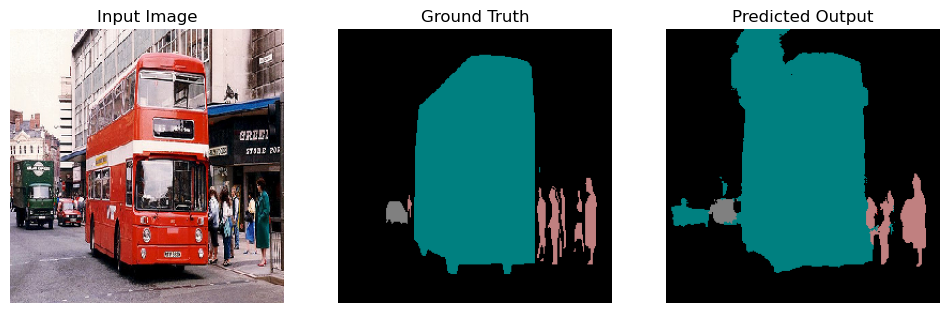

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0  7 14 15]
output_class_lst:  [ 0  6  7 14 15]


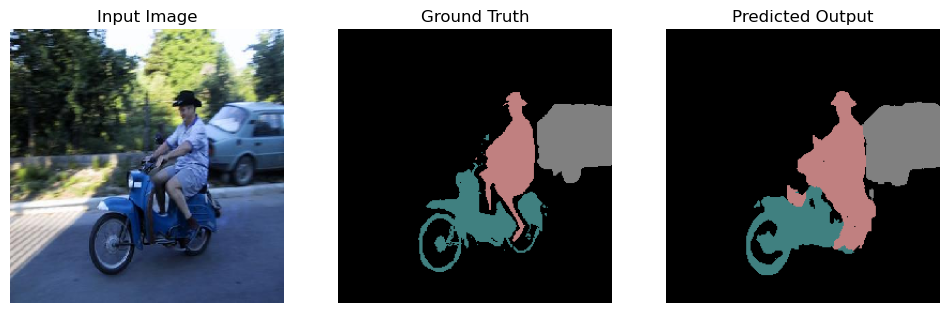

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0 12 17]
output_class_lst:  [ 0  8 12 17]


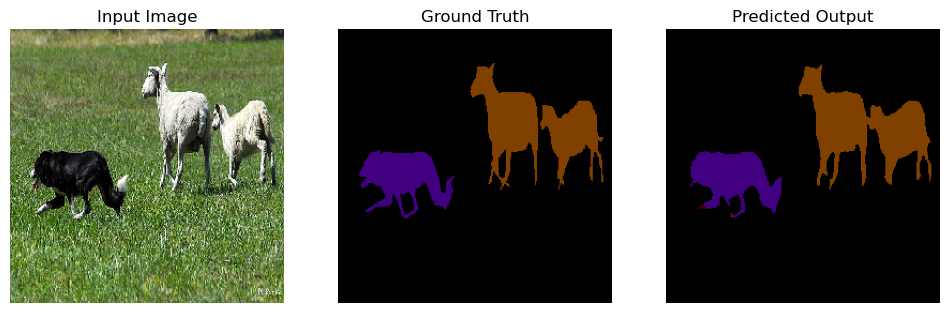

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0 13 15]
output_class_lst:  [ 0  9 10 11 12 13 15]


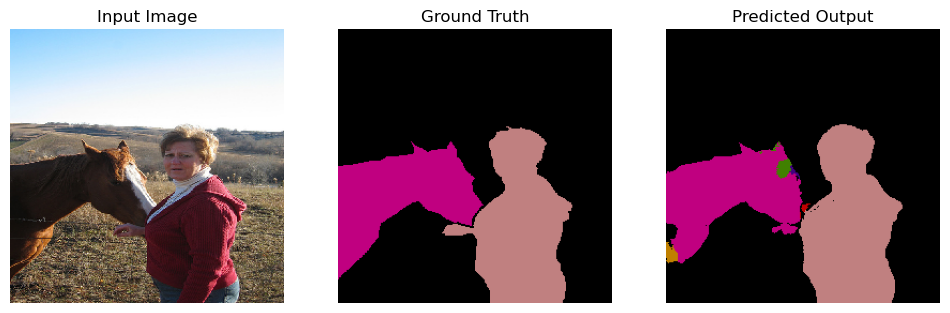

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0 15 18]
output_class_lst:  [ 0  1  7  9 15 18]


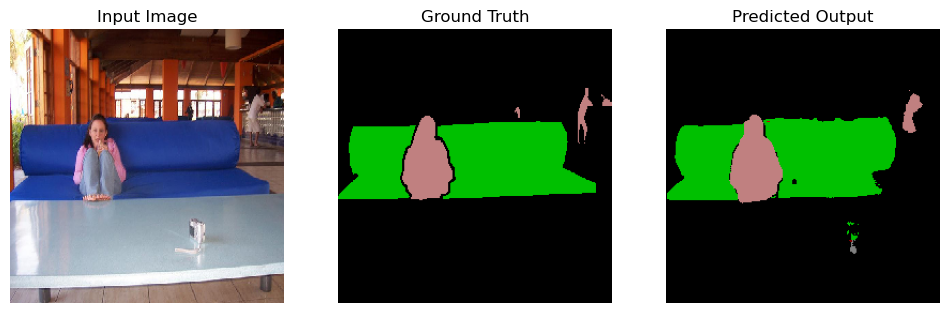

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0  5  9 11 15 16]
output_class_lst:  [ 0  9 11 15 18]


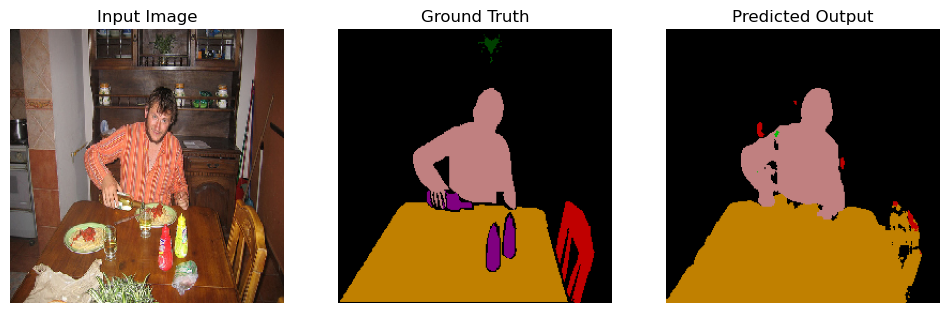

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0  5  9 11 15]
output_class_lst:  [ 0  9 11 15 18]


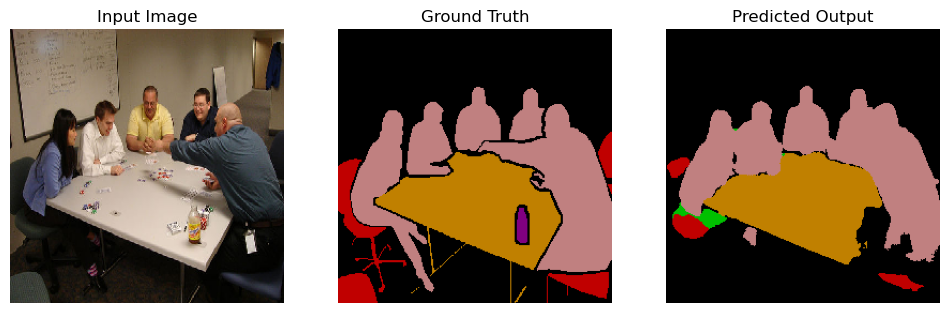

img_shape:  (256, 256, 3)
label_shape:  (256, 256)
output_shape:  (256, 256)
label_class_lst:  [ 0 15 16]
output_class_lst:  [ 0 11 15 16 18]


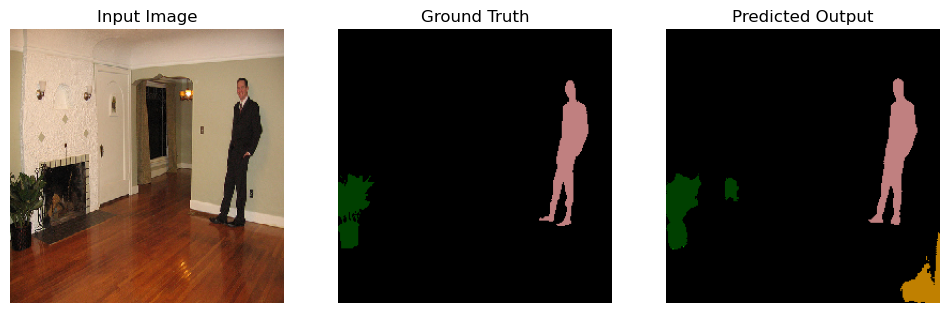

In [6]:
### pre/loss_dl_0.5
# [1:] 안한거
'''
sample(562)
sample(300)
sample(397)
sample(125)
sample(565)
sample(388)
sample(129)
sample(416)
sample(272)
sample(352)
'''
# [1:] 
'''
sample(316)
sample(24)
sample(446)
sample(276)
sample(428)
sample(576)
sample(505)
sample(459)
sample(322)
sample(382)
'''
# mIoU
sample(561)
sample(502)
sample(297)
sample(552)
sample(195)
sample(366)
sample(97)
sample(264)
sample(198)
sample(154)